## Problema materias de preinscripción

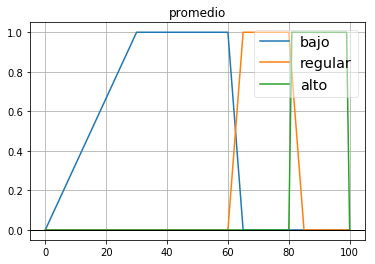

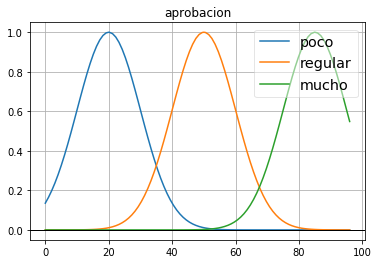

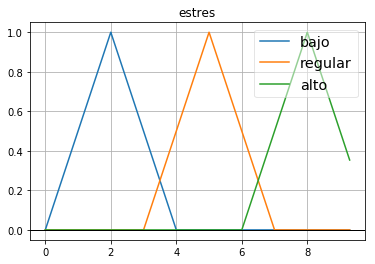

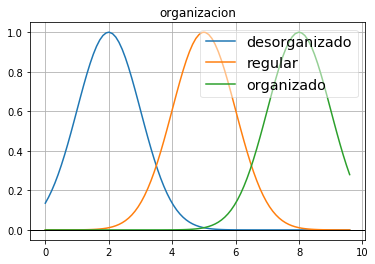

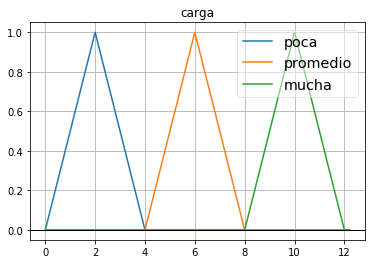

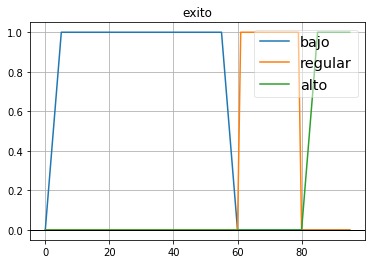

In [140]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid, Heights, CenterOfSets
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

# 1- Promedio general (Calificación)
promedio_bajo = FuzzySet('bajo', Trapmf([0,30,60,65]))
promedio_regular = FuzzySet('regular', Trapmf([60,65,80,85]))
promedio_alto = FuzzySet('alto', Trapmf([80,81,99,100]))
promedio = FuzzyVariable('promedio',[promedio_bajo,promedio_regular,promedio_alto],universe=[0,101])
promedio.show()

# 2 Porcentaje promedio de la aprobación de alumnos de las materias a tomar (Porcentaje)
aprobacion_poco = FuzzySet('poco', Gaussmf([10,20]))
aprobacion_regular = FuzzySet('regular', Gaussmf([10, 50]))
aprobacion_mucho = FuzzySet('mucho', Gaussmf([10, 85]))
aprobacion = FuzzyVariable('aprobacion',[aprobacion_poco, aprobacion_regular,aprobacion_mucho], universe=[0, 100])
aprobacion.show()

# 3 Nivel de estres (Escala 0-10)
estres_bajo = FuzzySet('bajo',Trimf([0,2,4]))
estres_regular = FuzzySet('regular', Trimf([3,5,7]))
estres_alto = FuzzySet('alto', Trimf([6,8,10]))
estres = FuzzyVariable('estres',[estres_bajo,estres_regular,estres_alto], universe=[0, 10])
estres.show()

# 4 Habilidad organización de tiempo (Escala 0-10)
organizacion_desorganizado = FuzzySet('desorganizado', Gaussmf([1,2]))
organizacion_regular = FuzzySet('regular', Gaussmf([1, 5]))
organizacion_organizado = FuzzySet('organizado', Gaussmf([1,8]))
organizacion = FuzzyVariable('organizacion',[organizacion_desorganizado,organizacion_regular,organizacion_organizado], universe=[0,10])
organizacion.show()

# 5 Carga de materias  (Porcentaje)
carga_poca = FuzzySet('poca', Trimf([0,2,4]))
carga_promedio = FuzzySet('promedio', Trimf([4,6,8]))
carga_mucha = FuzzySet('mucha', Trimf([8,10,12]))
carga = FuzzyVariable('carga', [carga_poca, carga_promedio,carga_mucha], universe=[0, 13])
carga.show()


#OUTPUT
# 1 Nivel de exito (Porcentaje)
exito_bajo = FuzzySet('bajo',Trapmf([0,5,55,60]))
exito_regular = FuzzySet('regular',Trapmf([60,61,79,80]))
exito_alto = FuzzySet('alto', Trapmf([80,85,95,100]))
exito = FuzzyVariable('exito',[exito_bajo, exito_regular,exito_alto], universe=[0, 100])
exito.show()


#RULES
ant1  = Antecedent(promedio['bajo'] & aprobacion['poco'] & estres['alto'] & organizacion['desorganizado'] & carga['mucha'])
cont1 = Consequent(exito['bajo'])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(promedio['bajo'] & aprobacion['mucho'] | estres['regular'] & organizacion['regular'] | carga['promedio'])
cont2 = Consequent(exito['regular'])
rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(promedio['regular'] & aprobacion['regular'] & estres['regular'] & organizacion['desorganizado'] & carga['promedio'])
cont3 = Consequent(exito['bajo'])
rule3 = FuzzyRule(ant3, cont3)

ant4  = Antecedent(promedio['regular'] & aprobacion['mucho'] | estres['bajo'] | organizacion['organizado'] & carga['mucha'])
cont4 = Consequent(exito['regular'])
rule4 = FuzzyRule(ant4, cont4)

ant5  = Antecedent(promedio['alto'] & aprobacion['poco'] | estres['alto'] | organizacion['organizado'] & carga['promedio'])
cont5 = Consequent(exito['alto'])
rule5 = FuzzyRule(ant5, cont5)

ant6  = Antecedent(promedio['alto'] & aprobacion['mucho'] & estres['bajo'] & organizacion['regular'] & carga['promedio'])
cont6 = Consequent(exito['alto'])
rule6 = FuzzyRule(ant6, cont6)

# #Building the FIS

fis = FuzzyInferenceSystem([rule1,rule2,rule3,rule4,rule5,rule6], and_op='prod', or_op='sum')                


# Caso de prueba 1


Evaluation of FIS with inputs:
promedio: 60
aprobacion: 10
estres: 8
organizacion: 2
carga: 10
	IF promedio is bajo and aprobacion is poco and estres is alto and organizacion is desorganizado and carga is mucha THEN exito is bajo = [0.6065306597126334] with weight = 1
	IF promedio is bajo or aprobacion is mucho or estres is regular or organizacion is regular or carga is promedio THEN exito is regular = [6.101936677605324e-13] with weight = 1
	IF promedio is regular and aprobacion is regular and estres is regular and organizacion is desorganizado and carga is promedio THEN exito is bajo = 0.0 with weight = 1
	IF promedio is regular or aprobacion is mucho or estres is bajo or organizacion is organizado or carga is mucha THEN exito is regular = [1.522997974471263e-08] with weight = 1
	IF promedio is alto or aprobacion is poco or estres is alto or organizacion is organizado or carga is promedio THEN exito is alto = [1.0] with weight = 1
	IF promedio is alto and aprobacion is mucho and est

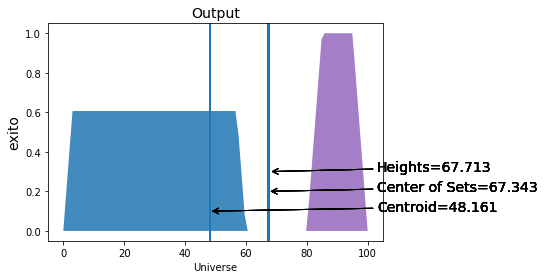

In [141]:
#FIS Evaluation

inputs = {'promedio':60, 'aprobacion':10,'estres':8, 'organizacion':2,'carga':10}
result = fis.eval(inputs)
result.show([Centroid, CenterOfSets, Heights])

In [142]:
Centroid(result).eval()

{'exito': array(48.16050865)}

In [143]:
Heights(result).eval()

{'exito': array(67.71346488)}

In [144]:
CenterOfSets(result).eval()

{'exito': array(67.3433214)}

# Caso de prueba 2


Evaluation of FIS with inputs:
promedio: 90
aprobacion: 85
estres: 1
organizacion: 8
carga: 8
	IF promedio is bajo and aprobacion is poco and estres is alto and organizacion is desorganizado and carga is mucha THEN exito is bajo = 0.0 with weight = 1
	IF promedio is bajo or aprobacion is mucho or estres is regular or organizacion is regular or carga is promedio THEN exito is regular = [0.0] with weight = 1
	IF promedio is regular and aprobacion is regular and estres is regular and organizacion is desorganizado and carga is promedio THEN exito is bajo = 0.0 with weight = 1
	IF promedio is regular or aprobacion is mucho or estres is bajo or organizacion is organizado or carga is mucha THEN exito is regular = [1.0] with weight = 1
	IF promedio is alto or aprobacion is poco or estres is alto or organizacion is organizado or carga is promedio THEN exito is alto = [0.9999999999999999] with weight = 1
	IF promedio is alto and aprobacion is mucho and estres is bajo and organizacion is regular

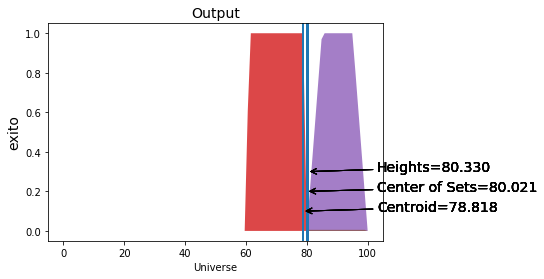

In [145]:
#FIS Evaluation

inputs2 = {'promedio':90, 'aprobacion':85,'estres':1, 'organizacion':8,'carga':8}
result2 = fis.eval(inputs2)

result2.show([Centroid, CenterOfSets, Heights])

In [146]:
Centroid(result2).eval()

{'exito': array(78.81758764)}

In [147]:
Heights(result2).eval()

{'exito': array(80.32960686)}

In [148]:
CenterOfSets(result2).eval()

{'exito': array(80.02124866)}

# Caso de prueba 3


Evaluation of FIS with inputs:
promedio: 75
aprobacion: 65
estres: 4
organizacion: 6
carga: 8
	IF promedio is bajo and aprobacion is poco and estres is alto and organizacion is desorganizado and carga is mucha THEN exito is bajo = 0.0 with weight = 1
	IF promedio is bajo or aprobacion is mucho or estres is regular or organizacion is regular or carga is promedio THEN exito is regular = [0.3032653298563167] with weight = 1
	IF promedio is regular and aprobacion is regular and estres is regular and organizacion is desorganizado and carga is promedio THEN exito is bajo = 5.4454384927533225e-05 with weight = 1
	IF promedio is regular or aprobacion is mucho or estres is bajo or organizacion is organizado or carga is mucha THEN exito is regular = [0.25235492758449124] with weight = 1
	IF promedio is alto or aprobacion is poco or estres is alto or organizacion is organizado or carga is promedio THEN exito is alto = [0.1353352832366127] with weight = 1
	IF promedio is alto and aprobacion is mu

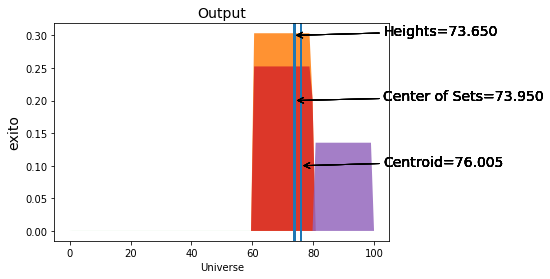

In [149]:
#FIS Evaluation
inputs3 = {'promedio':75, 'aprobacion':65,'estres':4, 'organizacion':6,'carga':8}
result3 = fis.eval(inputs3)

result3.show([Centroid, CenterOfSets, Heights])

In [150]:
Centroid(result3).eval()

{'exito': array(76.00487001)}

In [151]:
Heights(result3).eval()

{'exito': array(73.65045948)}

In [152]:
CenterOfSets(result3).eval()

{'exito': array(73.94976146)}